# DETECCIÓN DE OUTLIERS

Uno de los problemas más habituales en los conjuntos de datos es la presencia de valores anómalos que se encuentran fuera de la distribución natural de los datos. Se trata de los valores outliers, o simplemente outliers. Estos valores pueden reducir la eficacia de los modelos de aprendizaje automático y debemos limpiar los conjuntos de datos previamente para evitarlo.


> Note: Uno de los problemas más habituales en los conjuntos de datos es la presencia de valores anómalos que se encuentran fuera de la distribución natural de los datos. Se trata de los valores outliers, o simplemente outliers. Estos valores pueden reducir la eficacia de los modelos de aprendizaje automático y debemos limpiar los conjuntos de datos previamente para evitarlo.

Existen en la literatura numerosos algoritmos que permiten detectar la presencia de outliers en un conjunto de datos para marcar cada ejemplo como outlier o no outlier. Por razones de extensión, en esta asignatura veremos de forma resumida solo un algoritmo: el algoritmo de envolvente elíptica. En el algoritmo de envolvente elíptica (elliptic envelope en inglés) se presupone que los datos siguen una distribución normal (distribución gaussiana). 

Si los datos no siguen dicha distribución, los resultados podrían no ser los deseados. Es decir, los outliers determinados por el algoritmo podrían no serlos e, igualmente, ejemplos no estimados como outliers sí que podrían serlo. El algoritmo de envolvente elíptica crea superficies elípticas en torno a la nube de puntos con valores normales en el conjunto de datos. Conforme la superficie elíptica es mayor, mayor distancia tienen los puntos que pertenecen a esta con respecto a los puntos con valores normales y, por tanto, mayor probabilidad de que estos sean outliers

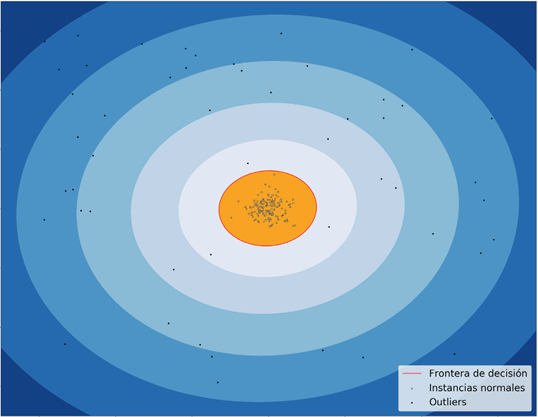

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [ ]:
# Carga de datos.
df = pd.read_csv("outliers.csv")
print(df)

En el Programa, se importan, en primer lugar, los datos del archivo`outliers.csv`. Este es un conjunto de datos artificial que posee `2` atributos y `200` instancias, de las cuales las primeras `150` contienen valores normales y las `50` últimas son outliers. Los valores de ambos atributos se encuentran en el rango [–7, 7].

### 1) EllipticEnvelope()

In [ ]:
# Entrenamos un objeto de tipo EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42) #Random_State se utiliza en casi todos los algoritmos que utilizamos para determinar el pseudo-randomness. El Parámetro de contamination nos da la posible proporción de outliers en el dataset.
outlier_method = algorithm.fit(df)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

In [ ]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers
def find_outliers(df, algorithm):
    return algorithm.fit(df).predict(df), np.where(df_outliers==-1)[0]

In [ ]:
x,y = find_outliers(df, algorithm)
print (x)
print(y)

### 2) Otros métodos similares

Existen numerosas técnicas que pretenden determinar el valor más adecuado para un valor ausente. Estas técnicas se denominan imputación (o estimación) de valores ausentes. Una de las técnicas más simples consiste en sustituir los valores ausentes por la media aritmética, mediana o moda del atributo en el que se encuentran. 

Si el atributo es numérico, entonces se suele usar la media aritmética o mediana. Si el atributo es categórico, se suele usar la moda. Otras técnicas más complejas plantean el problema como de aprendizaje supervisado e incluyen la creación de un modelo de conocimiento para la estimación de valores ausentes.

### IsolationForest

Devuelve la puntuación de anomalía de cada muestra utilizando el algoritmo `IsolationForest`

IsolationForest `aísla` las observaciones seleccionando aleatoriamente una característica y luego seleccionando aleatoriamente un valor dividido entre los valores máximo y mínimo de la característica seleccionada.

Dado que la partición recursiva se puede representar mediante una estructura de árbol, el número de divisiones necesarias para aislar una muestra es equivalente a la longitud del camino desde el nodo raíz hasta el nodo final.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(42)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

In [ ]:
import matplotlib.pyplot as plt

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class", loc="upper left")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

### OneClassSVM
Detección de valores atípicos no supervisados.

Estimar el soporte de una distribución de alta dimensión.

La implementación se basa en `libsvm`.

Crearemos un conjunto de datos de muestra aleatorio para este tutorial usando la función make_blob(). Verificaremos el conjunto de datos visualizándolo en un gráfico.

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import random

random.seed(42)
x, _ = make_blobs(n_samples=200, 
                  centers=1, 
                  cluster_std=.3, 
                  center_box=(8, 8))
print("SAMPLE")
print("-------")
print (x[:5])
print("-------")
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

Definiremos el modelo utilizando la clase `OneClassSVM` de la API Scikit-learn. Aquí configuraremos RBF para el tipo de kernel y definiremos los argumentos `gamma` y `nu`.

- En el aprendizaje automático, el núcleo de función de base radial, o núcleo `RBF`, es una función de núcleo popular que se utiliza en varios algoritmos de aprendizaje kernelizado. En particular, se usa comúnmente en la clasificación de SVM.

- Los núcleos `RBF `son la forma más generalizada de kernelización y es uno de los núcleos más utilizados debido a su similitud con la distribución gaussiana. La función kernel `RBF` para dos puntos X₁ y X₂ calcula la similitud o qué tan cerca están entre sí.

- Intuitivamente, el parámetro `gamma` define hasta dónde llega la influencia de un único ejemplo de entrenamiento, donde los valores bajos significan "lejos" y los valores altos significan "cerca". Los parámetros `gamma` pueden verse como la inversa del radio de influencia de las muestras seleccionadas por el modelo SVM.

- El parámetro `nu` es un límite superior de la fracción de errores de margen y un límite inferior de la fracción de vectores de soporte en relación con el número total de ejemplos de entrenamiento. Por ejemplo, si lo establece en `0,05`, tiene la garantía de encontrar que como máximo el `5 %` de sus ejemplos de capacitación estarán mal clasificados (aunque a costa de un pequeño margen) y al menos el `5 %` de sus ejemplos de capacitación serán vectores de soporte.


- Ajustaremos el modelo con el conjunto de datos x y obtendremos los datos de predicción utilizando el método `fit()` y `predict()`.

- A continuación, extraeremos los resultados negativos como valores atípicos.

- Finalmente, visualizaremos los resultados en un gráfico resaltando las anomalías con un color.

In [ ]:
svm.fit(x)
pred = svm.predict(x)

In [ ]:
anom_index = where(pred==-1)
values = x[anom_index]

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

### LocalOutlierFactor

Detección de valores atípicos no supervisados mediante el factor de valores atípicos locales (LOF).

La puntuación de anomalía de cada muestra se denomina factor de valor atípico local. Mide la desviación local de la densidad de una muestra determinada con respecto a sus vecinas. Es local en el sentido de que la puntuación de anomalía depende de qué tan aislado esté el objeto con respecto al vecindario circundante. 

Más precisamente, la localidad viene dada por k vecinos más cercanos, cuya distancia se utiliza para estimar la densidad local. Al comparar la densidad local de una muestra con las densidades locales de sus vecinas, se pueden identificar muestras que tienen una densidad sustancialmente menor que la de sus vecinas. Estos se consideran valores atípicos.

In [ ]:
# TASK: Investigar sobre LocalOutlierFactor e implementar código para detectar outliers

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# IF = IsolationForest(n_estimators = 100, 
#                      contamination=0.25, 
#                      random_state=42) #Hace particiones y va analizando por cada partición.
# OC_SVM = OneClassSVM(gamma='auto')
# LOF = LocalOutlierFactor(n_neighbors=2)


df_outliers, pos_outliers = find_outliers(df, IF)

display(df_outliers)
print('\nNúmero de outliers: \n', len(pos_outliers))

In [ ]:
# Eliminamos los outliers, nos quedamos con aquellos valores que solo tienen 1
new_df = df[df_outliers==1]
print(new_df)

### 3) Box plot

In [ ]:
# Seleccionamos el atributo que vamos a medir
a = df['a'] #Anilizamos los de la columna a

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25) #Tomo el quartil 25 (1)
Q3 = stats.scoreatpercentile(a, 75) #Tomo el quartil 75 (3)
RIC = Q3 - Q1 #Caja - Inter-Quartile Range or IQR
li = Q1 - 1.5*RIC #xmin - Limite inferior
ls = Q3 + 1.5*RIC #xmax - Limite superior

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)


In [ ]:
# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0] #Buscamos los valores que están por debajo del LI
pos_s = np.where(a>ls)[0] #Buscamos los valores que están por arriba del LS
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

In [ ]:
# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.show()

In [ ]:
# Definir una función que devuelva los límites del diagrama de caja y bigotes dada una variable

def find_limits_BP(df):
    # Seleccionamos el atributo que vamos a medir
    b = df

    # Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
    Q1 = stats.scoreatpercentile(b, 25)
    Q3 = stats.scoreatpercentile(b, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC #xmin
    ls = Q3 + 1.5*RIC #xmax

    # Observamos los límites inferior y superior
    print('limite inferior: ', li)
    print('limite superior: ', ls)

    # Buscamos la posición de los outliers
    pos_i = np.where(b<li)[0]
    pos_s = np.where(b>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))
    print('Posición de outliers: ', pos_outliers)
    print('Número de outliers: ', len(pos_outliers))

    # Dibujamos el diagrama de caja y bigotes
    prop = plt.boxplot(b)
    plt.boxplot(b)
    plt.show()


In [ ]:
find_limits_BP(df)

Mayor información: [Método para detección de outliers](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)